<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

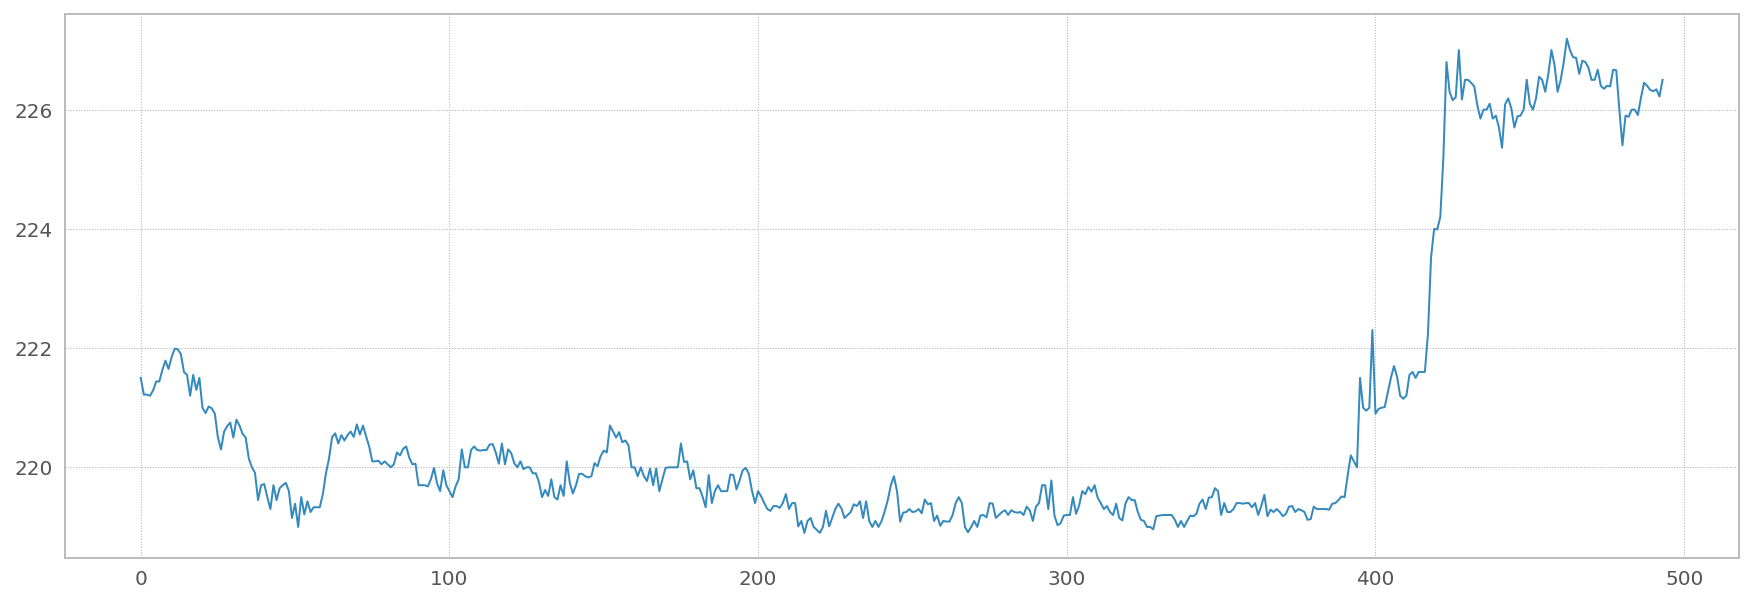

In [1]:
%load_ext autoreload
%autoreload 2
from scipy.optimize import shgo
from utils import gen_CV, gen_BBANDS

gazp = pd.read_csv("gazp.csv", parse_dates=["Date"])
ts = gazp.sort_values("Date")["Close"].values

cv = gen_CV(gazp)
idx = cv[2][0]
plt.plot(ts[idx]);

In [2]:
ret = gen_BBANDS(ts, idx, 20, 1)
np.multiply.reduce(1 + ret) - 1
# 0.0022104807379528246

-0.018692583184691247

In [3]:
from utils import optimize_BBANDS
res = optimize_BBANDS(ts, idx)
-res['fun']
# 0.026201703033322143

0.019110951630131545

In [4]:
%timeit optimize_BBANDS(ts, idx)
# 47 ms ± 183 µs

19.5 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
res = []
for i, (_,test) in enumerate(cv[2:]):
    res.append(optimize_BBANDS(ts, test))

In [6]:
idx = cv[2:][37][1]
%timeit optimize_BBANDS(ts,idx)

25.6 ms ± 78.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


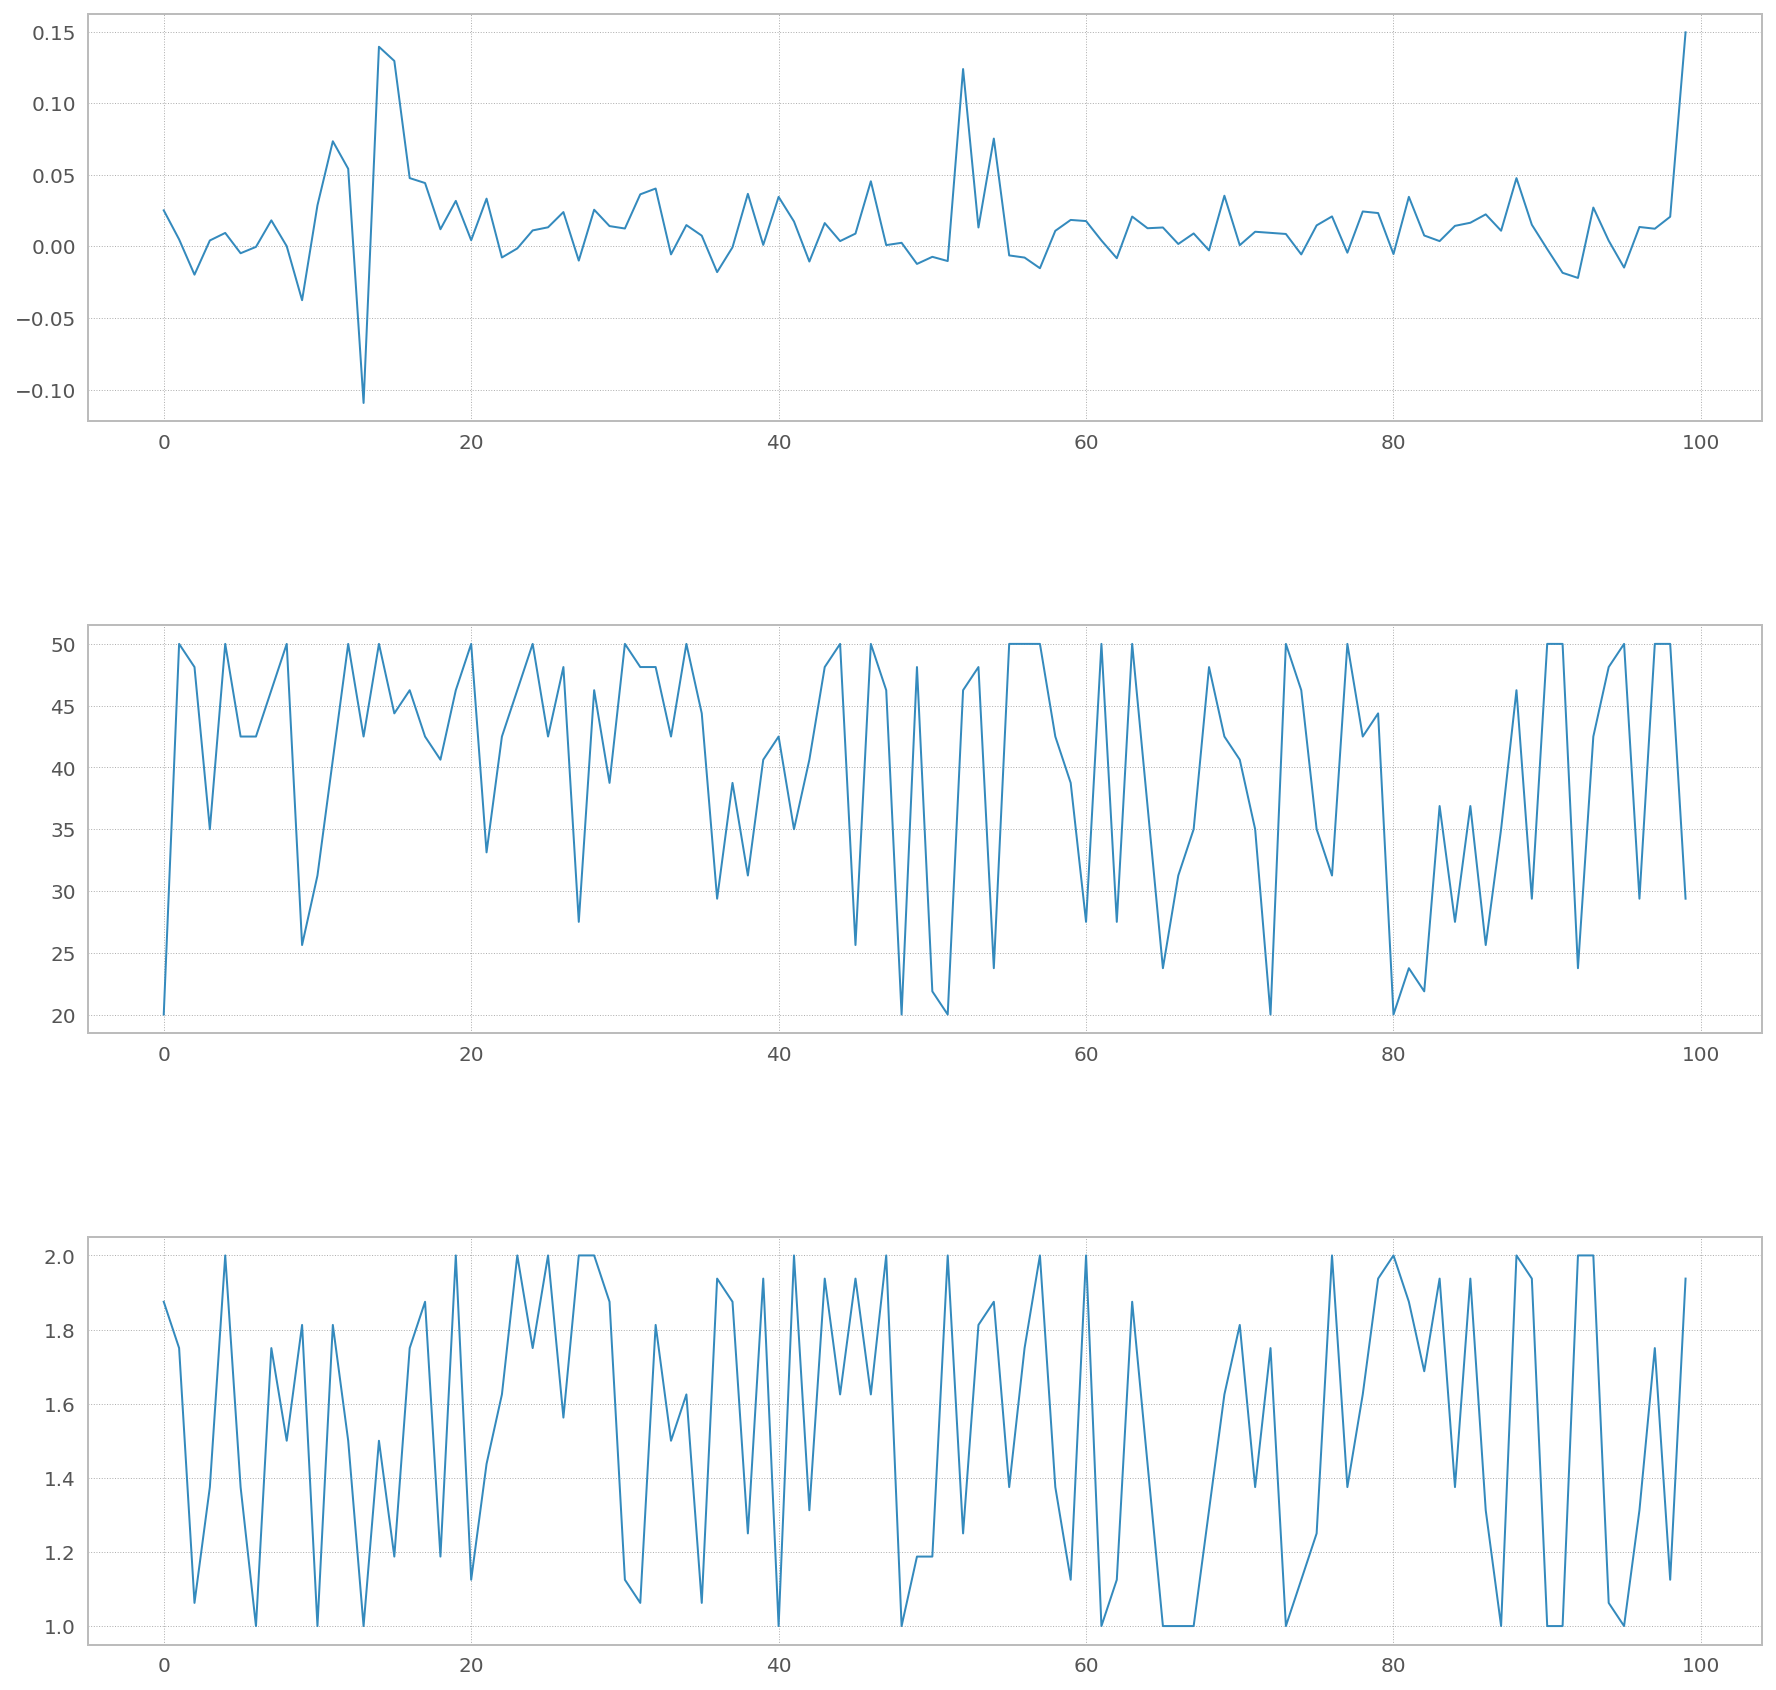

In [7]:
ret = [-r['fun'] for r in res]
l = [r['x'][0] for r in res]
s = [r['x'][1] for r in res]
_, (ax, ax2, ax3) = plt.subplots(3,1, figsize=(15,15))
ax.plot(ret[:100])
ax2.plot(l[:100])
ax3.plot(s[:100]);

In [8]:
from talib import BBANDS
idx = cv[5][0]
res = optimize_BBANDS(ts, idx)
-res['fun'], res['x']

(-0.01973009422841232, array([48.125 ,  1.0625]))

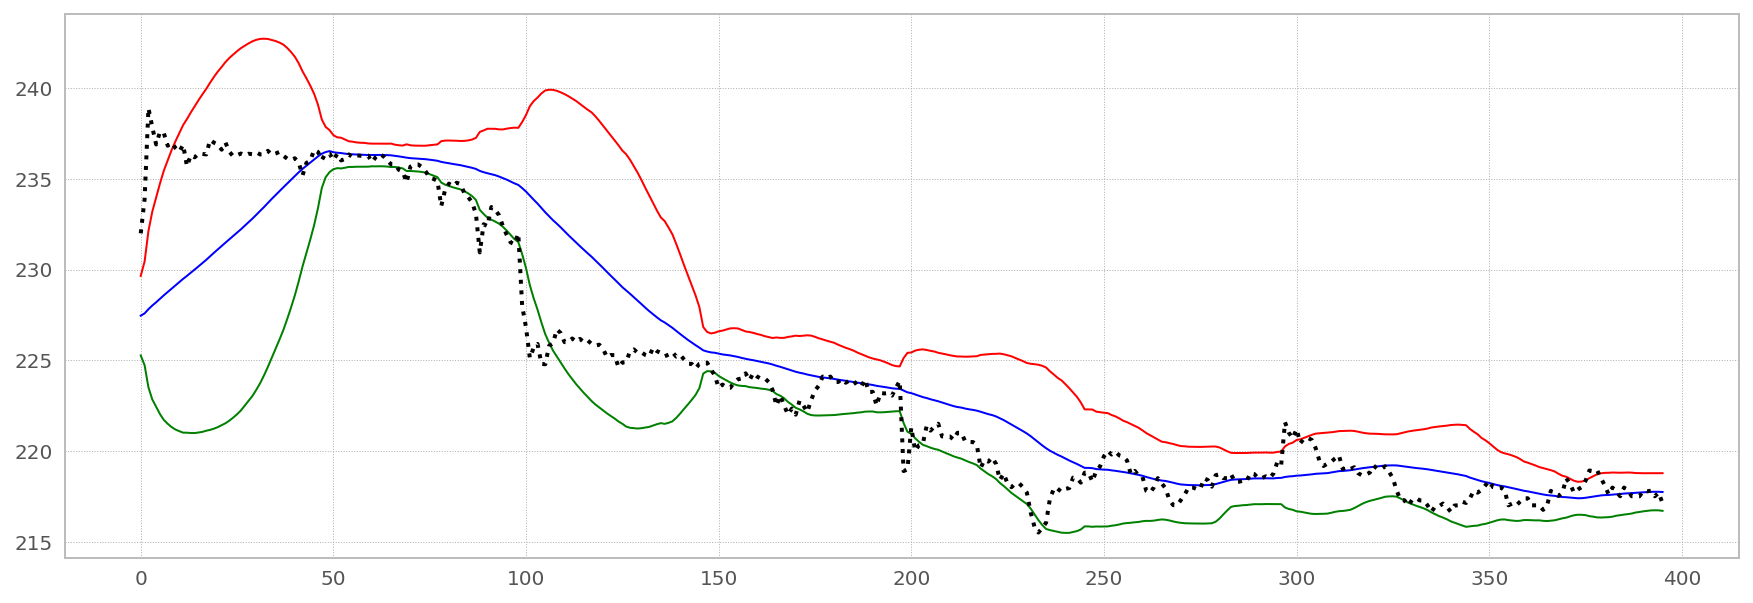

In [14]:
l = 237
upper, middle, lower = BBANDS(ts[(min(idx)-l):max(idx)+1], 48, 2, 2)
upper=upper[l:]
middle=middle[l:]
lower=lower[l:]
plt.plot(upper, color="red")
plt.plot(middle, color="blue")
plt.plot(lower, color="green")
plt.plot(ts[idx], linestyle=":", linewidth=2, color="black");

In [12]:
ret = gen_BBANDS(ts, idx, 48, 1)
np.multiply.reduce(1+ret) - 1

-0.019085771279638064